# ***SVM para datos inseparables linealmente (SVM Kernalizada)***
***Ejercicio con datos sintéticos para dos características INSEPARABLES LINEALMENTE (Clasificación Binaria)***

Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos

**Clase:** 9


Para efectos prácticos de la explicación de este ejercicio se creó una distribución de datos **sintéticos con 200 muestras**, 100 por cada clase. [Ejercicio de clasificación binaria].

Las dos primeras características de la distribución de los datos se ha hecho mediante funciones Seno y Coseno para dar un efecto de distribuciones circulares añadiendo cierto nivel de ruido.

La tercera característica ha sido construida mediante una combinación no lineal de las dos primeras características, así:

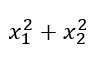



A continuación se grafican las dos primeras características, en donde se ve claramente que no hay una separación lineal posible:

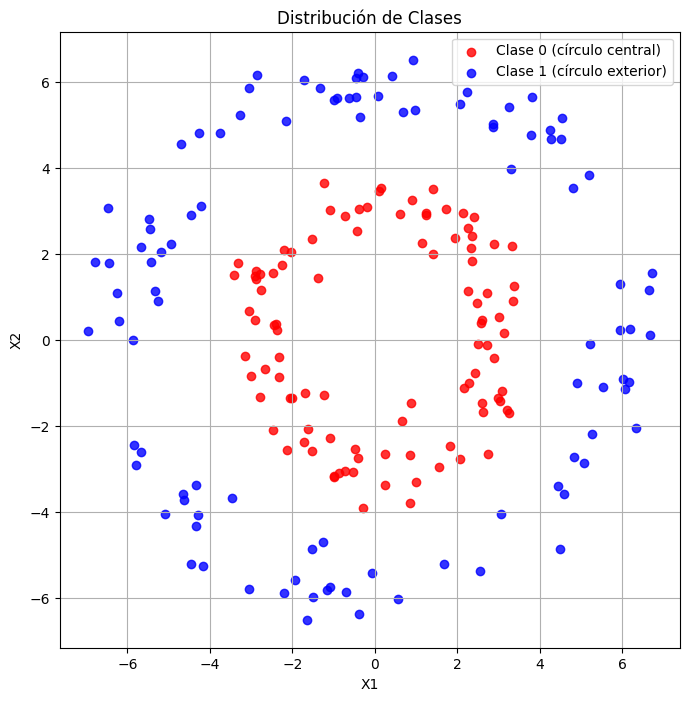

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(num_samples):
    # Número de muestras para cada clase (debe ser par para tener 100 muestras en cada clase)
    num_samples_per_class = num_samples // 2

    # Generar la primera clase (círculo en el centro)
    radius_center = 3
    theta_center = np.random.rand(num_samples_per_class) * 2 * np.pi
    x_center = radius_center * np.cos(theta_center) + np.random.normal(0, 0.5, num_samples_per_class)
    y_center = radius_center * np.sin(theta_center) + np.random.normal(0, 0.5, num_samples_per_class)

    # Generar la segunda clase (círculo que rodea al primero)
    radius_outer = 6
    theta_outer = np.random.rand(num_samples_per_class) * 2 * np.pi
    x_outer = radius_outer * np.cos(theta_outer) + np.random.normal(0, 0.5, num_samples_per_class)
    y_outer = radius_outer * np.sin(theta_outer) + np.random.normal(0, 0.5, num_samples_per_class)

    # Combinar los puntos de ambas clases
    X = np.vstack([np.hstack([x_center, x_outer]), np.hstack([y_center, y_outer])]).T
    y = np.hstack([np.zeros(num_samples_per_class), np.ones(num_samples_per_class)])  # Etiquetas de las clases

    # Calcular la nueva columna x3 como x1^2 + x2^2
    X = np.hstack([X, (X[:, 0]**2 + X[:, 1]**2).reshape(-1, 1)])

    return X, y

# Generar los datos con 200 muestras (100 de cada clase)
num_samples_total = 200
X, y = generate_data(num_samples_total)

# Graficar los datos
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', label='Clase 0 (círculo central)', alpha=0.8)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', label='Clase 1 (círculo exterior)', alpha=0.8)
plt.title('Distribución de Clases')
plt.xlabel('X1')
plt.ylabel('X2')

# Mover la leyenda a la esquina superior derecha
plt.legend(loc='upper right')

plt.grid(True)
plt.show()


A continuación, se hace la graficación de las tres características. En este caso se observa que anexar esta característica extra por supuesto aumenta la dimensionalidad, pero a su vez permite ver que existe una separación posible lineal (en este caso mediante un hiperplano).

Con lo anterior se demuestra que si se usara una **función de mapeo** a partir de las características originales mediante combinaciones no lineales, es posible encontrar la separabilidad mediante una SVM lineal.

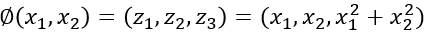

In [3]:
import plotly.graph_objects as go

# Graficar en 3D usando plotly.graph_objects (go)
fig = go.Figure()

# Agregar scatter plot 3D
fig.add_trace(go.Scatter3d(
    x=X[y == 0, 0],  # x1 para la clase 0
    y=X[y == 0, 1],  # x2 para la clase 0
    z=X[y == 0, 2],  # x3 para la clase 0
    mode='markers',
    marker=dict(color='red'),
    name='Clase 0 (círculo central)'
))

fig.add_trace(go.Scatter3d(
    x=X[y == 1, 0],  # x1 para la clase 1
    y=X[y == 1, 1],  # x2 para la clase 1
    z=X[y == 1, 2],  # x3 para la clase 1
    mode='markers',
    marker=dict(color='blue'),
    name='Clase 1 (círculo exterior)'
))

# Configurar el diseño del gráfico 3D
fig.update_layout(
    title='Distribución en 3D con x1, x2, y x3',
    scene=dict(
        xaxis_title='X1',
        yaxis_title='X2',
        zaxis_title='X3',
        xaxis=dict(range=[min(X[:, 0]) - 1, max(X[:, 0]) + 1]),
        yaxis=dict(range=[min(X[:, 1]) - 1, max(X[:, 1]) + 1]),
        zaxis=dict(range=[min(X[:, 2]) - 1, max(X[:, 2]) + 1]),
    ),
)

# Mostrar el gráfico
fig.show()


El anterior gráfico demuestra que justamente haber aplicado la **función de mapeo propuesta** permitió generar una distinción, entre ambas clases. Por tanto, es claro que con el simple hecho de aplicar una SVM con kernel lineal se podrá separar las dos clases.

Lo anterior se presenta a continuación:

# **Clasificación usando SVC Kernel Lineal**

In [4]:
from sklearn.svm import SVC

svm_1 = SVC(kernel='linear', C=1.0, random_state=1)
svm_1.fit(X, y)

SVC(kernel='linear', random_state=1)

Se obtiene entonces mediante **.coef** y **.intercept** los valores del hiperplano de separación:

A, B, C que son los coeficientes (.coef)
D que es (.intercept_)

In [5]:
# Extraer los coeficientes y el término de intersección del hiperplano
w = svm_1.coef_[0]
b = svm_1.intercept_[0]

print(w)
print(b)

[-0.0265753  -0.02214248  0.23206133]
-4.656168959048953


Función para graficar superfice de separación en 3D:

In [6]:
def plot_3d_decision_boundary(X, y, svm_model):
    # Crear una figura 3D
    fig = go.Figure()

    # Agregar scatter plot 3D para cada clase
    fig.add_trace(go.Scatter3d(
        x=X[y == 0, 0], y=X[y == 0, 1], z=X[y == 0, 2],
        mode='markers', marker=dict(color='red'), name='Clase 0 (círculo central)'
    ))
    fig.add_trace(go.Scatter3d(
        x=X[y == 1, 0], y=X[y == 1, 1], z=X[y == 1, 2],
        mode='markers', marker=dict(color='blue'), name='Clase 1 (círculo exterior)'
    ))

    # Extraer los coeficientes y el término de intersección del hiperplano
    w = svm_model.coef_[0]
    b = svm_model.intercept_[0]

    # Encontrar los límites del espacio de características
    x1_range = np.linspace(min(X[:, 0]), max(X[:, 0]), 50)
    x2_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 50)
    x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)
    x3_mesh = (-w[0] * x1_mesh - w[1] * x2_mesh - b) / w[2]

    # Agregar el hiperplano al gráfico 3D
    fig.add_trace(go.Surface(x=x1_mesh, y=x2_mesh, z=x3_mesh, colorscale='Viridis', opacity=0.8))

    # Configuración del diseño del gráfico 3D
    fig.update_layout(
        title='Distribución en 3D con Hiperplano de SVM',
        scene=dict(
            xaxis_title='X1',
            yaxis_title='X2',
            zaxis_title='X3',
        ),
    )

    # Mostrar el gráfico
    fig.show()

In [7]:
# Graficar en 3D con el hiperplano
plot_3d_decision_boundary(X, y, svm_1)

Se  crea la función para el gráfico de las superficies de decisión:

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')

Se toma solo las dos primeras características (Que no son separables linealmente)

In [9]:
X_reduced = X[:, :2]  # Tomar solo las dos primeras columnas

Se procede a entrenar una Máquina de Soporte Vectorial usando un kernel Gaussiano con el objetivo de buscar la separabilidad de los datos.

Validar que ahora se debe de tener presente la variación de los valores de gamma (parámetro libre de optimización) y C (parámetro para regularización)

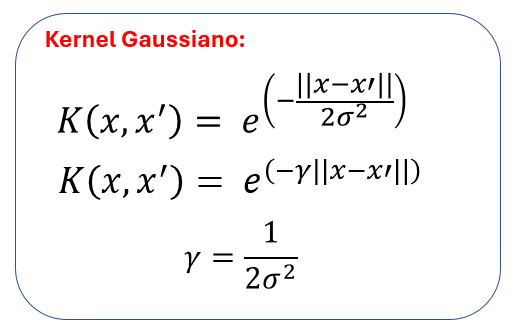

Ejemplo con gamma = 0.1

<ipython-input-8-d41a432f281d>:24: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



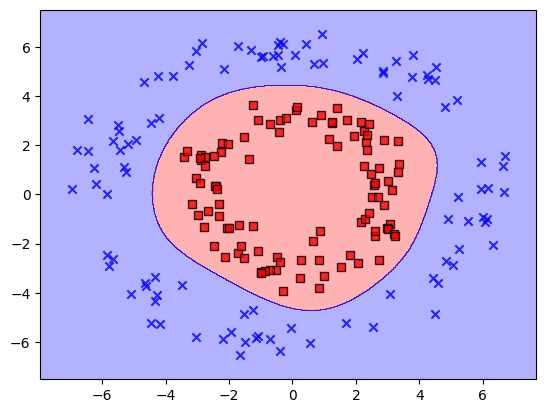

In [10]:
from sklearn.svm import SVC

svm_2 = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm_2.fit(X_reduced, y)
plot_decision_regions(X_reduced, y, classifier=svm_2)

Ejemplo con gamma = 100

<ipython-input-8-d41a432f281d>:24: UserWarning:

You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



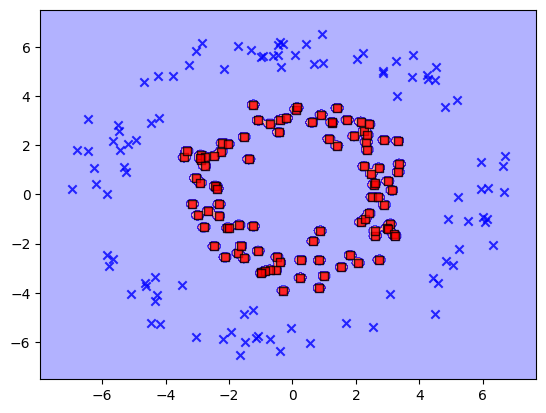

In [11]:
svm_2 = SVC(kernel='rbf', random_state=1, gamma=100, C=10.0)
svm_2.fit(X_reduced, y)
plot_decision_regions(X_reduced, y, classifier=svm_2)

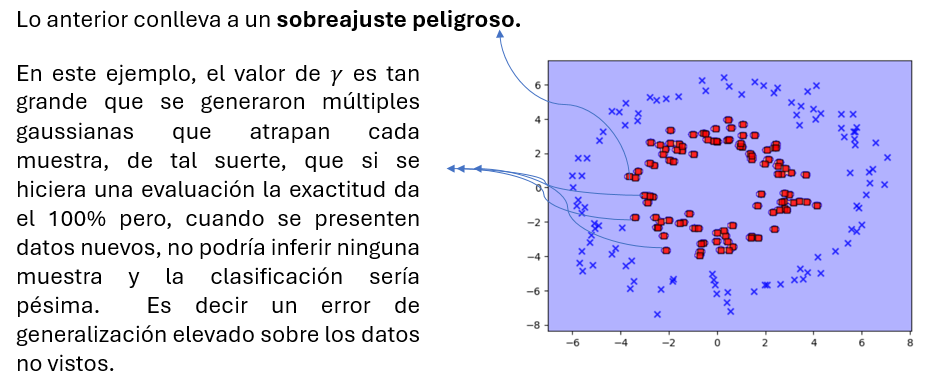